In [1]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import re
from tqdm.notebook import tqdm
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/AI 코드/감성분류 모델/train_df.csv')
train_df

,document,labels
0,둘쨋날은 미친듯이 밟아봤더니 기어가 헛돌면서 틱틱 소리가 나서 경악.,2
1,"이거 뭐 삐꾸를 준 거 아냐 불안하고, 거금 투자한 게 왜 이래.. 싶어서 정이 확...",2
2,간사하게도 그 이후에는 라이딩이 아주 즐거워져서 만족스럽게 탔다.,1
3,벌써 꽃가루 날리고 날벌레 날아다녀서 좀 방해되는 구간이 있긴 했지만 전반적으로 도...,1
4,샥이 없는 모델이라 일반 도로에서 타면 노면의 진동 때문에 손목이 덜덜덜 떨리고 이...,0
...,...,...
11770,"사용으로 카드 인한 혜택이 명확하고, 친절한 고객 서비스 때문에 만족스러웠어요.",1
11771,"카드 사용으로 인한 혜택이 친절한 명확하고, 고객 서비스 때문에 만족스러웠어요.",1
11772,"카드 사용으로 혜택이 인한 명확하고, 친절한 고객 서비스 때문에 만족스러웠어요.",1
11773,받은 광고에 언급된 혜택과 실제로 카드 혜택이 일치해서 만족해요.,1


In [4]:
test_df = pd.read_csv('/content/drive/MyDrive/AI 코드/감성분류 모델/val_df.csv')
test_df

,document,labels
0,엄마 사드렸는데 배도 편하게 눌러주고 미디가 길어 편하다고...다섯가지 색상 모두...,1
1,색깔도 다양하고 핏도 이쁘네요. 다만 인견이라곤해도 시원한 인견은 아니고 오늘같은 ...,0
2,사이즈가 크게 나왔으니 꼭~~확인하세요. 제가 엉덩이와 허벅지가 굵어서 사이즈를 크...,1
3,여름에 입긴 시원하거나 얇진 않고 지금 입기 딱 좋은 두께감과 지금 입기 좋은 원단...,1
4,사이즈가 조금 크게 나온거 같아요. 바지는 입으면 편하고 좋아요. 한치수 작게 주문...,0
...,...,...
241,소비자들이 가장 많이 사용하는 상품중 고르고 고른 상품 중 하나입니다. 친구가 이...,1
242,꽃이 피는 계절이 오려고 이렇게 한 번 더 추운 것이라고 여겨야 하겠습니다. 다리...,2
243,온 가족이 사용할 수 있는 제품이라 안심하고 선택한 상품 소개해요. 가격대비 품질...,1
244,붉은 노을 속에서 멋지게 걸어 나오는 영웅의 모습과 하루 일을 끝마치고 돌아가는 믿...,1


In [ ]:
def preprocess(df):
    for idx, row in tqdm(df.iterrows(), desc='preprocess', total=len(df)):
        new_doc = re.sub('[^가-힣a-zA-Z]', ' ', row['document']).strip()
        df.loc[idx, 'clean_document'] = new_doc
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

preprocess:   0%|          | 0/11775 [00:00<?, ?it/s]

preprocess:   0%|          | 0/246 [00:00<?, ?it/s]

In [ ]:
train_df

,document,labels,clean_document
0,둘쨋날은 미친듯이 밟아봤더니 기어가 헛돌면서 틱틱 소리가 나서 경악.,2,둘쨋날은 미친듯이 밟아봤더니 기어가 헛돌면서 틱틱 소리가 나서 경악
1,네,1,네
2,아니오,2,아니오
3,아니요,2,아니요
4,"이거 뭐 삐꾸를 준 거 아냐 불안하고, 거금 투자한 게 왜 이래.. 싶어서 정이 확...",2,이거 뭐 삐꾸를 준 거 아냐 불안하고 거금 투자한 게 왜 이래 싶어서 정이 확...
...,...,...,...
11770,"사용으로 카드 인한 혜택이 명확하고, 친절한 고객 서비스 때문에 만족스러웠어요.",1,사용으로 카드 인한 혜택이 명확하고 친절한 고객 서비스 때문에 만족스러웠어요
11771,"카드 사용으로 인한 혜택이 친절한 명확하고, 고객 서비스 때문에 만족스러웠어요.",1,카드 사용으로 인한 혜택이 친절한 명확하고 고객 서비스 때문에 만족스러웠어요
11772,"카드 사용으로 혜택이 인한 명확하고, 친절한 고객 서비스 때문에 만족스러웠어요.",1,카드 사용으로 혜택이 인한 명확하고 친절한 고객 서비스 때문에 만족스러웠어요
11773,받은 광고에 언급된 혜택과 실제로 카드 혜택이 일치해서 만족해요.,1,받은 광고에 언급된 혜택과 실제로 카드 혜택이 일치해서 만족해요


In [ ]:
test_df

,document,labels,clean_document
0,엄마 사드렸는데 배도 편하게 눌러주고 미디가 길어 편하다고...다섯가지 색상 모두...,1,엄마 사드렸는데 배도 편하게 눌러주고 미디가 길어 편하다고 다섯가지 색상 모두...
1,색깔도 다양하고 핏도 이쁘네요. 다만 인견이라곤해도 시원한 인견은 아니고 오늘같은 ...,0,색깔도 다양하고 핏도 이쁘네요 다만 인견이라곤해도 시원한 인견은 아니고 오늘같은 ...
2,사이즈가 크게 나왔으니 꼭~~확인하세요. 제가 엉덩이와 허벅지가 굵어서 사이즈를 크...,1,사이즈가 크게 나왔으니 꼭 확인하세요 제가 엉덩이와 허벅지가 굵어서 사이즈를 크...
3,여름에 입긴 시원하거나 얇진 않고 지금 입기 딱 좋은 두께감과 지금 입기 좋은 원단...,1,여름에 입긴 시원하거나 얇진 않고 지금 입기 딱 좋은 두께감과 지금 입기 좋은 원단...
4,사이즈가 조금 크게 나온거 같아요. 바지는 입으면 편하고 좋아요. 한치수 작게 주문...,0,사이즈가 조금 크게 나온거 같아요 바지는 입으면 편하고 좋아요 한치수 작게 주문...
...,...,...,...
241,소비자들이 가장 많이 사용하는 상품중 고르고 고른 상품 중 하나입니다. 친구가 이...,1,소비자들이 가장 많이 사용하는 상품중 고르고 고른 상품 중 하나입니다 친구가 이...
242,꽃이 피는 계절이 오려고 이렇게 한 번 더 추운 것이라고 여겨야 하겠습니다. 다리...,2,꽃이 피는 계절이 오려고 이렇게 한 번 더 추운 것이라고 여겨야 하겠습니다 다리...
243,온 가족이 사용할 수 있는 제품이라 안심하고 선택한 상품 소개해요. 가격대비 품질...,1,온 가족이 사용할 수 있는 제품이라 안심하고 선택한 상품 소개해요 가격대비 품질...
244,붉은 노을 속에서 멋지게 걸어 나오는 영웅의 모습과 하루 일을 끝마치고 돌아가는 믿...,1,붉은 노을 속에서 멋지게 걸어 나오는 영웅의 모습과 하루 일을 끝마치고 돌아가는 믿...


## Sentencepiece 전처리

In [ ]:
import sentencepiece as spm

In [ ]:
with open('/content/drive/MyDrive/sentiment_analysis/cnn_text.txt', 'w', encoding='utf-8') as f:
    f.write(train_df['clean_document'].str.cat(sep='\n'))

In [ ]:
spm.SentencePieceTrainer.Train('--input=/content/drive/MyDrive/sentiment_analysis/cnn_text.txt --model_type=bpe \
                                --model_prefix=/content/drive/MyDrive/sentiment_analysis/cnn_text --vocab_size=50000 \
                                --max_sentence_length=283 --shuffle_input_sentence=true')

In [ ]:
# 센텐스피스 모델을 로드한다.
sp = spm.SentencePieceProcessor()
sp.Load('/content/drive/MyDrive/sentiment_analysis/cnn_text.model')

train_df['tokens'] = train_df['clean_document'].map(lambda x: " ".join(sp.EncodeAsPieces(x)) )

train_df[['clean_document', 'tokens']].head()

,clean_document,tokens
0,둘쨋날은 미친듯이 밟아봤더니 기어가 헛돌면서 틱틱 소리가 나서 경악,▁둘쨋날은 ▁미친듯이 ▁밟아봤더니 ▁기어가 ▁헛돌면서 ▁틱틱 ▁소리가 ▁나서 ▁경악
1,네,▁네
2,아니오,▁아니오
3,아니요,▁아니요
4,이거 뭐 삐꾸를 준 거 아냐 불안하고 거금 투자한 게 왜 이래 싶어서 정이 확...,▁이거 ▁뭐 ▁삐꾸를 ▁준 ▁거 ▁아냐 ▁불안하고 ▁거금 ▁투자한 ▁게 ▁왜 ▁이래...


In [ ]:
import csv
vocab_list = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/cnn_text.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁좋,0
4,니다,-1
5,▁사,-2
6,네요,-3
7,▁가,-4
8,▁아,-5
9,▁이,-6


In [ ]:
train_token_text = []

for i in train_df['clean_document']:
    train_token_text.append(sp.encode_as_ids(i))

train_token_text = np.array(train_token_text, dtype=object)
train_token_text

array([list([28659, 25580, 31790, 15149, 28472, 23214, 729, 687, 39003]),
       list([1452]), list([38141]), ...,
       list([250, 558, 529, 1018, 3801, 3302, 3199, 2926, 679, 1983]),
       list([944, 1828, 3758, 1687, 1318, 250, 529, 2959, 323]),
       list([250, 1828, 3758, 1687, 529, 944, 1318, 2959, 323])],
      dtype=object)

In [ ]:
test_token_text = []

for i in test_df['clean_document']:
    test_token_text.append(sp.encode_as_ids(i))

test_token_text = np.array(test_token_text, dtype=object)
test_token_text

array([list([688, 12134, 95, 48712, 509, 2711, 543, 156, 48816, 48710, 4713, 2446, 22, 0, 530, 246, 657, 2152, 13001, 14914, 1886, 351, 39]),
       list([11572, 1689, 2757, 2152, 284, 93, 49354, 40, 49445, 746, 1153, 93, 49354, 48720, 1969, 1284, 1332, 416, 1469, 2262, 48713, 5504, 6, 43252, 49034, 1781, 934, 423, 14355, 4558, 500]),
       list([298, 665, 45000, 774, 1673, 1890, 871, 6042, 48855, 12084, 15703, 41, 110, 48783, 665, 4909, 31324, 963, 1386, 48783, 4050, 509, 2152, 875, 48, 137, 28680, 4738, 48837, 48731, 483, 465, 665, 4909, 15999, 298, 18, 28936, 3019, 11370, 278, 1515, 48781, 19547, 246, 799, 174, 4073, 48704]),
       list([1129, 7895, 6909, 1298, 475, 48803, 222, 834, 1781, 172, 88, 1938, 2983, 834, 1781, 88, 2109, 252, 11551, 49773, 31623, 1525, 1781, 7990, 48755, 128, 248, 77, 2855, 620, 368, 9448]),
       list([298, 141, 665, 30536, 128, 48, 137, 4910, 375, 55, 2320, 1408, 351, 1470, 4465, 369]),
       list([597, 2522, 101, 29, 801, 6545, 48719, 5339, 1386, 449

In [ ]:
data = train_token_text

x_train, x_val, y_train, y_val = train_test_split(data, train_df['labels'], test_size = 0.2, stratify = train_df['labels'], random_state=2023)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Conv1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.backend import clear_session
from sklearn.metrics import classification_report

In [ ]:
MAX_SEQUENCE_LENGTH = 128

train_inputs = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)# 학습 데이터를 벡터화
train_labels = np.array(y_train) # 학습 데이터의 라벨
val_inputs = pad_sequences(x_val, maxlen=MAX_SEQUENCE_LENGTH) # 평가 데이터를 벡터화
val_labels = np.array(y_val) # 평가 데이터의 라벨
test_inputs = pad_sequences(test_token_text)
test_labels = np.array(test_df['labels'])

In [ ]:
print(train_inputs.shape[0])
print(val_inputs.shape[0])
print(test_inputs.shape[0])

9420
2355
246


## 1D-CNN

In [ ]:
kargs = {'model_name': 'cnn_classifier',
         'vocab_size': len(vocab_list),
         'embedding_size': 768,
         'num_filters': 50,
         'dropout_rate': 0.2,
         'hidden_dimension': [250, 100],
         'output_dimension': 3}

In [ ]:
class CNNClassifier(tf.keras.Model):

    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = Embedding(input_dim=kargs['vocab_size'],
                                         output_dim=kargs['embedding_size'])
        self.conv_list = [Conv1D(filters=kargs['num_filters'],
                                       kernel_size=kernel_size,
                                       padding='valid',
                                       activation=tf.keras.activations.relu,
                                       kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.)) for kernel_size in [3, 4, 5]]
        self.pooling = GlobalMaxPooling1D()
        self.dropout = Dropout(kargs['dropout_rate'])
        self.fc1 = Dense(units=kargs['hidden_dimension'][0],
                               activation = tf.keras.activations.relu,
                               kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc3 = Dense(units=kargs['output_dimension'],
                               activation='softmax',
                               kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))

    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc3(x)

        return x

In [ ]:
clear_session()

model_cnn = CNNClassifier(**kargs)

model_cnn.compile(optimizer = tf.keras.optimizers.Adam(),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy'),
                  metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=3, restore_best_weights=True)

In [ ]:
history_cnn = model_cnn.fit(train_inputs, y_train, batch_size=32, epochs=100, validation_data=[val_inputs, val_labels],
                    callbacks=[es])

Epoch 1/100
295/295 [==============================] - 28s 79ms/step - loss: 0.4977 - accuracy: 0.8194 - val_loss: 0.2716 - val_accuracy: 0.9142
Epoch 2/100
295/295 [==============================] - 12s 41ms/step - loss: 0.0844 - accuracy: 0.9768 - val_loss: 0.2781 - val_accuracy: 0.9219
Epoch 3/100
295/295 [==============================] - 8s 26ms/step - loss: 0.0355 - accuracy: 0.9925 - val_loss: 0.2684 - val_accuracy: 0.9287
Epoch 4/100
295/295 [==============================] - 6s 22ms/step - loss: 0.0310 - accuracy: 0.9943 - val_loss: 0.2741 - val_accuracy: 0.9244
Epoch 5/100
295/295 [==============================] - 6s 20ms/step - loss: 0.0250 - accuracy: 0.9951 - val_loss: 0.2788 - val_accuracy: 0.9274
Epoch 6/100
295/295 [==============================] - 4s 15ms/step - loss: 0.0243 - accuracy: 0.9945 - val_loss: 0.3273 - val_accuracy: 0.9265
Epoch 6: early stopping


In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

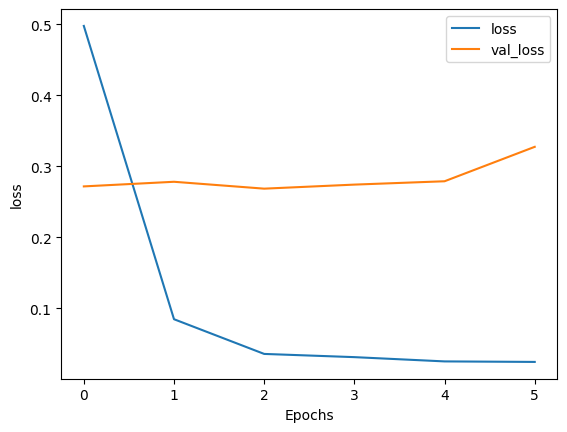

In [ ]:
plot_graphs(history_cnn, 'loss')

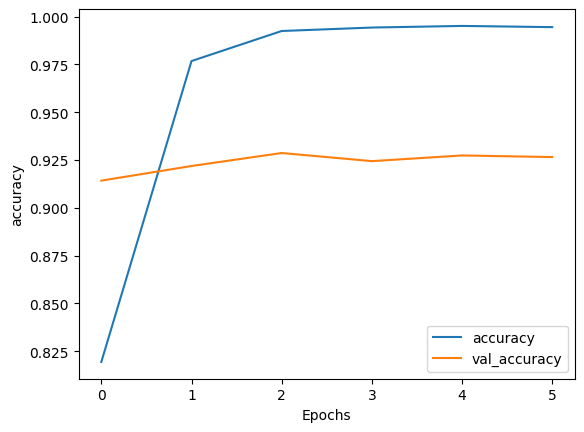

In [ ]:
plot_graphs(history_cnn, 'accuracy')

In [ ]:
cnn_pred = np.argmax(model_cnn.predict(test_inputs), axis=1)
pd.Series(cnn_pred).value_counts()

8/8 [==============================] - 0s 14ms/step


1    204
2     23
0     19
dtype: int64

In [ ]:
print(classification_report(test_labels, cnn_pred))

              precision    recall  f1-score   support

           0       0.74      0.27      0.39        52
           1       0.76      0.99      0.86       157
           2       0.78      0.49      0.60        37

    accuracy                           0.76       246
   macro avg       0.76      0.58      0.62       246
weighted avg       0.76      0.76      0.72       246



## LSTM

In [ ]:
model_name = 'rnn_classifier'

kargs = {'model_name': model_name,
        'vocab_size': len(vocab_list),
        'embedding_size': 768,
        'dropout_rate':0.2,
        'lstm_dimension': 150,
        'dense_dimension': 768,
        'output_dimension': 3}

In [ ]:
class RNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(RNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = Embedding(input_dim=kargs['vocab_size'],
                                         output_dim=kargs['embedding_size'])
        # self.lstm_1_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'],
        #                                         return_sequences=True)
        self.lstm_2_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'])
        self.dropout = Dropout(kargs['dropout_rate'])
        self.fc1 = Dense(units=kargs['dense_dimension'],
                               activation=tf.keras.activations.tanh)
        self.fc2 = Dense(units=kargs['output_dimension'],
                               activation='softmax')

    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        # x = self.lstm_1_layer(x)
        x = self.lstm_2_layer(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [ ]:
clear_session()

model_rnn = RNNClassifier(**kargs)
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy'),
                  metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

In [ ]:
history_rnn = model_rnn.fit(train_inputs, y_train, batch_size=32, epochs=100, validation_data=[val_inputs, val_labels],
                    callbacks=[es])

Epoch 1/100
295/295 [==============================] - 28s 87ms/step - loss: 0.7791 - accuracy: 0.6695 - val_loss: 0.5727 - val_accuracy: 0.7665
Epoch 2/100
295/295 [==============================] - 14s 47ms/step - loss: 0.3189 - accuracy: 0.8872 - val_loss: 0.2664 - val_accuracy: 0.9189
Epoch 3/100
295/295 [==============================] - 9s 32ms/step - loss: 0.0928 - accuracy: 0.9674 - val_loss: 0.2611 - val_accuracy: 0.9206
Epoch 4/100
295/295 [==============================] - 7s 23ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.2907 - val_accuracy: 0.9223
Epoch 5/100
295/295 [==============================] - 6s 20ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.2842 - val_accuracy: 0.9210
Epoch 6/100
295/295 [==============================] - 5s 18ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.2797 - val_accuracy: 0.9261
Epoch 7/100
295/295 [==============================] - 5s 17ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.2815 - val_accurac

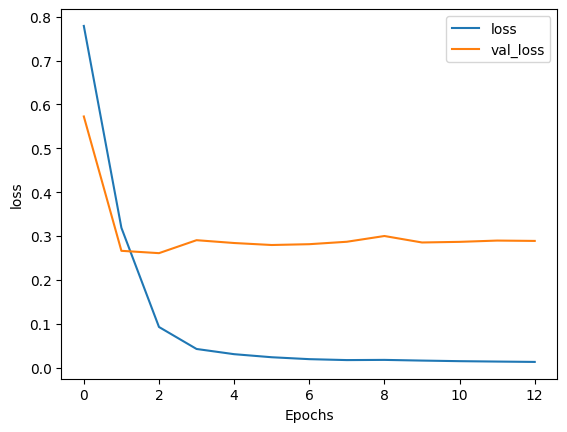

In [ ]:
plot_graphs(history_rnn, 'loss')

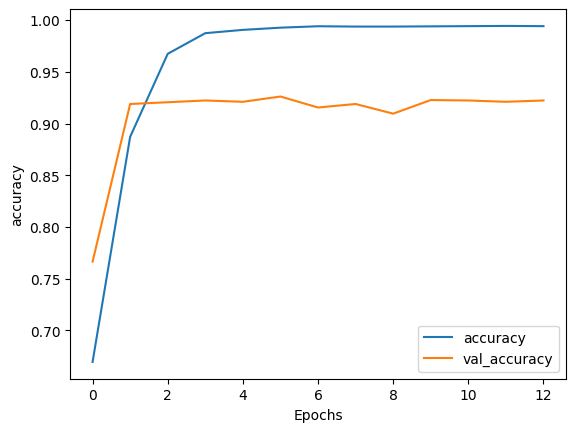

In [ ]:
plot_graphs(history_rnn, 'accuracy')

In [ ]:
rnn_pred = np.argmax(model_rnn.predict(test_inputs), axis=1)
pd.Series(rnn_pred).value_counts()

8/8 [==============================] - 0s 5ms/step


1    166
0     57
2     23
dtype: int64

In [ ]:
print(classification_report(test_labels, rnn_pred))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51        52
           1       0.83      0.87      0.85       157
           2       0.52      0.32      0.40        37

    accuracy                           0.72       246
   macro avg       0.61      0.58      0.59       246
weighted avg       0.71      0.72      0.71       246

